# NYC's Most Popular Dog Breed of 2018

The data has sorted to only included dogs that were licensed and were marked as having a known breed.
About 11.7% of the licensed dogs were registered as an "unknown" breed.

In [7]:
import csv
import numpy as numpy
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

#### Just a little preview of the data set, the full one can be viewed on github.

In [8]:
df = pd.read_csv("most-popular-breed-2018.csv")
df.head()

,dog_id,name,gender,birth_year,breed,borough,zipcode,issue_date,expire_date
0,1,COCO,F,2016,Staffordshire Bull Terrier,Staten Island,10306,2018-01-02,2019-01-30
1,2,CHLOE,F,2005,Yorkshire Terrier,Manhattan,10128,2018-01-02,2019-01-10
2,3,MILO,M,2011,Bichon Frise,Manhattan,10031,2018-01-02,2019-02-06
3,4,TONY,M,2011,Weimaraner,Queens,11357,2018-01-02,2019-02-17
4,5,FORTE,M,2007,Havanese,Manhattan,10023,2018-01-02,2020-01-13


#### I decided to try to count the values in python and then graph it rather than exporting a 2-column csv file just to see if it was easier to do in python.
FYI, it's about the same.

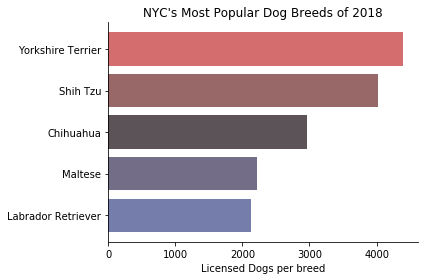

In [9]:
with open('most-popular-breed-2018.csv') as csv_file:
	csv_reader = csv.DictReader(csv_file)

	breed_counter = Counter()
	for row in csv_reader:
		breed_counter.update(row['breed'].split(';'))

breeds,popularity = map(list,zip(*breed_counter.most_common(5)))

plt.barh(breeds, popularity,color=['#d46d6d','#986767','#5c5358','#736d87','#757eab'])
plt.gca().invert_yaxis()

plt.title("NYC's Most Popular Dog Breeds of 2018")
plt.xlabel("Licensed Dogs per breed")
plt.ylabel("")


#removes top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()